<a href="https://colab.research.google.com/github/Khey17/100-Days-Of-ML-Code/blob/main/Neural_Network_Regression_with_TensorFlow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a continuous value based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating data to view and fit

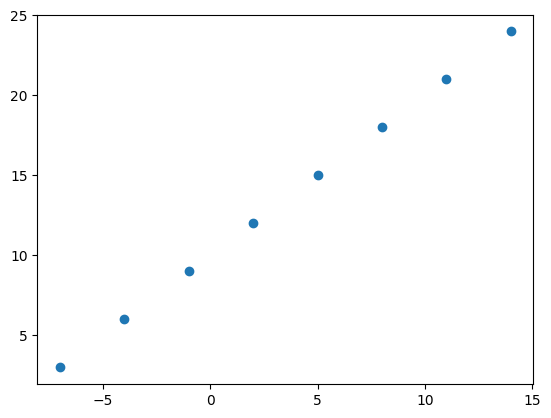

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [4]:
# y = X + 10
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [5]:
# Create a demo tensor for our housing prediction problem
house_info = tf.constant(['bedroom', 'bedroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bedroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X[0].ndim

0

In [8]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

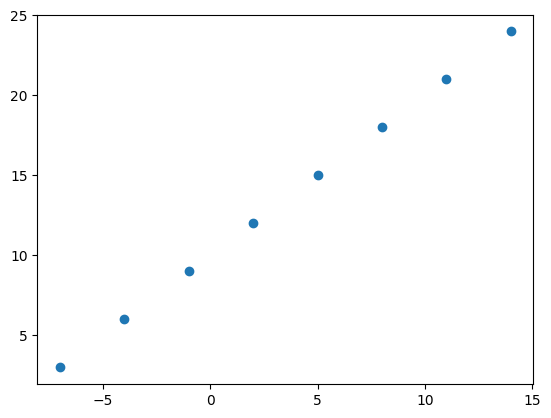

In [10]:
plt.scatter(X, y)

### Steps in modelling with TensorFlow

1. **Creating a model** - defing the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 472ms/step - loss: 18.4860 - mae: 18.4860
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 18.2047 - mae: 18.2047
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 17.9235 - mae: 17.9235
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 17.6422 - mae: 17.6422
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 17.3610 - mae: 17.3610


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 107ms/step


array([[-14.073608]], dtype=float32)

### Improve the model

We can improve our model, by altering the steps we took to create a model

1. **Create a model** - here we might add more layers, increase the no. of hidden layers, change the activation func of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization func.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [45]:
# Let's rebuild our model
tf.random.set_seed(42)

# 1. Create a model (Specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 927ms/step - loss: 13.5339 - mae: 13.5339
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1953 - mae: 10.1953
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 5.9475 - mae: 5.9475
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 6.1128 - mae: 6.1128
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1135 - mae: 7.1135
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 5.3233 - mae: 5.3233
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 3.8505 - mae: 3.8505
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 5.4213 - mae: 5.4213
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 6.0502 - mae: 6.0502
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 5.7705 - mae: 5.7705
Epoch 11/100
1/1 [==============================] - 0s 12ms/step

In [46]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [47]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 134ms/step


array([[27.789177]], dtype=float32)

### Common ways to improve a Deep Learning model
- Adding Layers
- Increase the number of hidden units
- Change the activation function of each layer
- Change the optimization function
- Change the learning rate of the optimization function
- Fitting on more data
- Fitting for longer

### Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> Fit it -> evaluate it -> tweak a model -> fit it -> tweak a model -> fit it...
```

When it comes to evaluation.. there are 3 words you should memorize:

> "Visualize, Visualize,..."

It's a good idea to visualize:
* The data - what data are working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [48]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)

# Make labels for the dataset
Y = X + 10

X, Y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

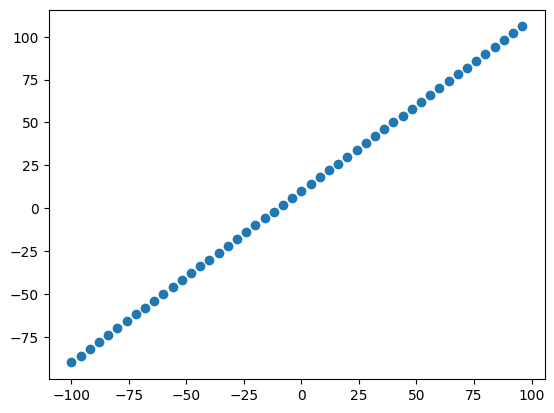

In [50]:
# Visualize the data
plt.scatter(X, Y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70%-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [63]:
### Split the data into train and test sets
X_train = X[:40]
y_train = Y[:40]

X_test = X[40:]
y_test = Y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize the data
Now we've got our data in training and test sets... let's visualize it again!

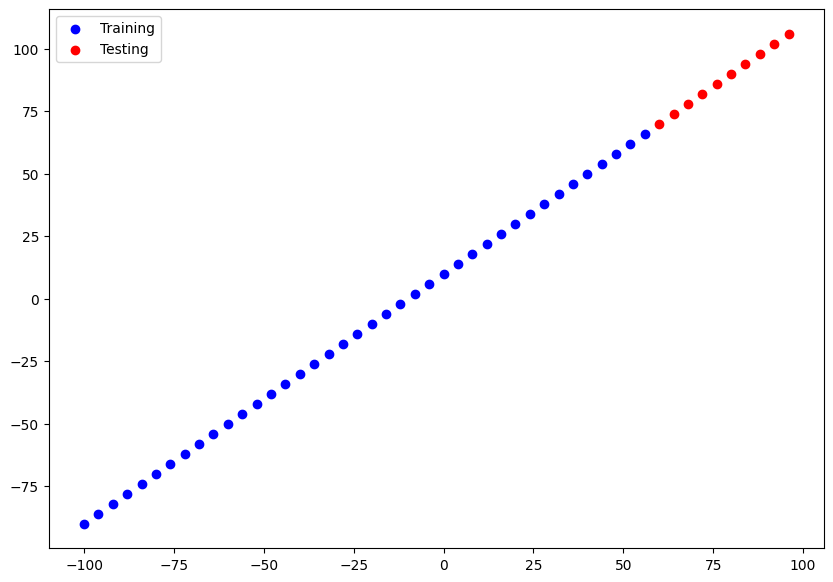

In [69]:
plt.figure(figsize=(10, 7))

# Plot training in blue
plt.scatter(X_train, y_train, c="b", label="Training")
# Plot validation in red
plt.scatter(X_test, y_test, c="r", label="Testing")
# Show a legend
plt.legend();

In [72]:
# Let's look at how to build a neural network for our data

tf.random.set_seed(42)

# 1. Create a model (Specified to your problem)
model_1 = tf.keras.Sequential([
    # tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model_1
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

# # 3. Fit the model_1
# model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualize our model

In [73]:
model_1.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [74]:
# Build our model
model_1.build(input_shape=(None, 1))
model_1.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [119]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (Specified to your problem)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, input_shape=[1], name='output_layer')
], name='model_2')

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

In [120]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 128)               256       
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total no. of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params- these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖**Resource:** For more in-depth overview of the trainable parameters with a layer, check out [MIT's introduction to deep learning video](https://www.youtube.com/watch?v=QDX-1M5Nj7s).

📑**Exercise:** Try playing around with the no. of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [121]:
# Let's fit our model to the training data
model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [122]:
# Get a summary of our model
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 128)               256       
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


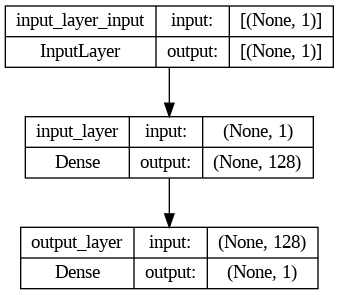

In [123]:
from tensorflow.keras.utils import plot_model

plot_model(model_2, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus model predictions).

In [124]:
# Make some predictions
y_pred = model_2.predict(X_test)
y_pred

1/1 [==============================] - 0s 59ms/step


array([[ 73.17604 ],
       [ 78.04554 ],
       [ 82.91504 ],
       [ 87.784546],
       [ 92.654045],
       [ 97.52356 ],
       [102.39306 ],
       [107.262566],
       [112.132065],
       [117.00157 ]], dtype=float32)

In [125]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to create a function for it.

In [126]:
# Let's create a plotting a function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  '''
  Plots training data, testing data, and compares the predictions to the ground truth labels.
  '''
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training")
  # Plot testing data in red
  plt.scatter(test_data, test_labels, c="r", label="Testing")
  # Plot the predictions in green
  plt.scatter(test_data, predictions, c="lightgreen", label="Predictions")
  # Show the legend
  plt.legend()
  # Show the plot
  plt.show();

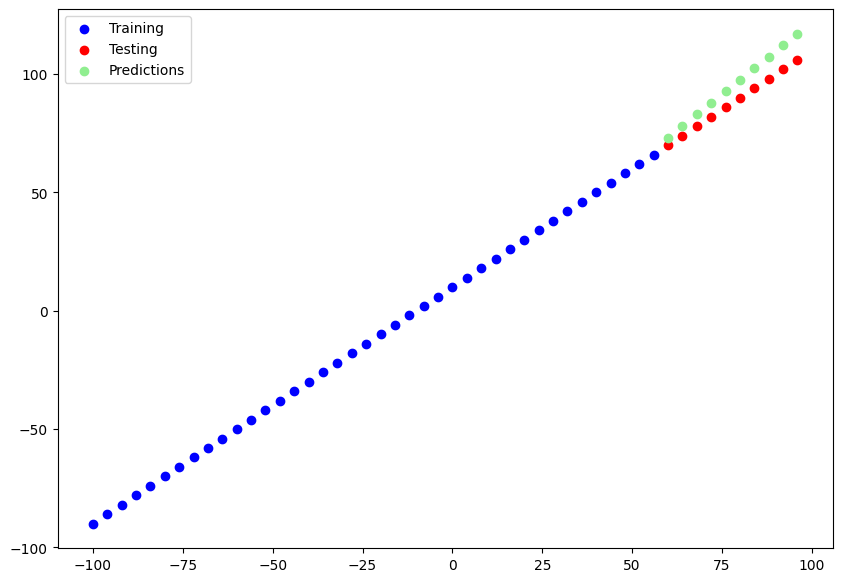

In [128]:
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression metrics